In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

In [7]:
AR2_Base = []
MAE_Base = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Base.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Base.append(mae)    

In [8]:
Base = pd.DataFrame({'AR2_Base': AR2_Base, 'MAE_Base': MAE_Base})
Base

,AR2_Base,MAE_Base
0,0.903211,14301.173808
1,0.879348,15349.359553
2,0.887548,14872.897233
3,0.849686,14485.407558
4,0.905693,14608.788220
...,...,...
95,0.915039,14421.134210
96,0.887379,15705.387789
97,0.895373,14719.680017
98,0.904588,14402.546409


In [9]:
base_drop1 = pd.read_csv('BaseDrop1.csv')

In [10]:
base_drop1.shape

(2579, 299)

In [11]:
X2 = base_drop1.drop(['SalePrice'], axis=1).values
y2 = base_drop1.SalePrice.values

In [12]:
len(y2)

2579

In [13]:
X2.shape

(2579, 298)

In [14]:
X2.shape[1]

298

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X2,y2,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)    

In [16]:
BaseDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
BaseDrop1

,AR2_Drop1,MAE_Drop1
0,0.915176,14848.850133
1,0.901937,14256.730677
2,0.917956,13875.867893
3,0.919563,13810.631210
4,0.913382,14515.224904
...,...,...
95,0.905352,13778.569623
96,0.905555,15128.089425
97,0.904413,13887.377760
98,0.904374,14454.995229


In [17]:
base_drop_IF = pd.read_csv('BaseDropIF.csv')

In [18]:
base_drop_IF.shape

(2568, 299)

In [19]:
X3 = base_drop_IF.drop(['SalePrice'], axis=1).values
y3 = base_drop_IF.SalePrice.values

In [20]:
AR2_DropIF = []
MAE_DropIF = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)    


In [21]:
BaseDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
BaseDropIF

,AR2_DropIF,MAE_DropIF
0,0.910312,13760.464104
1,0.909085,13968.187262
2,0.900466,13522.780090
3,0.918374,13312.664023
4,0.913396,14211.850539
...,...,...
95,0.918113,14090.535303
96,0.916533,13498.920952
97,0.915781,14459.213723
98,0.910221,13935.606290


In [22]:
box = pd.concat([Base, BaseDrop1, BaseDropIF], axis=1)
box

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.903211,14301.173808,0.915176,14848.850133,0.910312,13760.464104
1,0.879348,15349.359553,0.901937,14256.730677,0.909085,13968.187262
2,0.887548,14872.897233,0.917956,13875.867893,0.900466,13522.780090
3,0.849686,14485.407558,0.919563,13810.631210,0.918374,13312.664023
4,0.905693,14608.788220,0.913382,14515.224904,0.913396,14211.850539
...,...,...,...,...,...,...
95,0.915039,14421.134210,0.905352,13778.569623,0.918113,14090.535303
96,0.887379,15705.387789,0.905555,15128.089425,0.916533,13498.920952
97,0.895373,14719.680017,0.904413,13887.377760,0.915781,14459.213723
98,0.904588,14402.546409,0.904374,14454.995229,0.910221,13935.606290


In [23]:
box.describe()

,AR2_Base,MAE_Base,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.882930,14821.149434,0.911189,14312.506915,0.913559,14047.190631
std,0.033713,656.262397,0.008015,517.560714,0.008507,486.052528
min,0.781577,12978.169891,0.889967,13191.007280,0.892405,12907.943616
25%,0.857022,14366.610655,0.904876,13973.976525,0.908352,13759.038164
50%,0.895264,14748.967978,0.911661,14238.373741,0.914017,14089.003156
75%,0.905602,15278.396322,0.916750,14662.260290,0.918442,14360.985135
max,0.924818,16323.772689,0.931187,15561.619724,0.936117,15106.016629


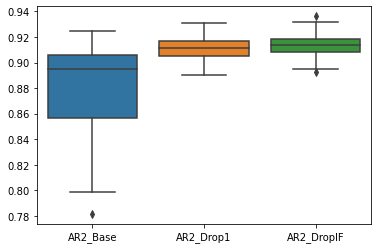

In [24]:
sns.boxplot(data=box[['AR2_Base','AR2_Drop1', 'AR2_DropIF']]);

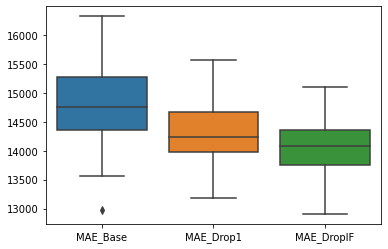

In [25]:
sns.boxplot(data=box[['MAE_Base', 'MAE_Drop1', 'MAE_DropIF']]);